# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning
Firstly I will import all the essential tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now I will see which is the default directory so that I can change it to fetch my data

The data is downloaded from Kaggle : https://www.kaggle.com/c/bluebook-for-bulldozers/data

Also I have done this project with reference to the online course Complete machine learning and data science bootcamp :-https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/29181590?start=150#overview

In [2]:
import os
os.getcwd()


'C:\\Users\\M Com'

In [3]:
os.chdir("C:\\voicetype video eg\\bluebook-for-bulldozers\\bluebook-for-bulldozers")

In [4]:
data=pd.read_csv("Train.csv",low_memory=False)

In [5]:
data.drop(["SalesID"],inplace=True,axis=1)

# EDA - Exploratory Data Analysis
now I will begin exploring the data using pandas and matplotlib 

In [6]:
data.head()

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(401125, 52)

**Thus there are 400k+ rows and 53 columns in our data**


**Lets check if there are any missing values in our data**

In [8]:
data.isna

<bound method DataFrame.isna of         SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0           66000     999089     3157         121           3.0      2004   
1           57000     117657       77         121           3.0      1996   
2           10000     434808     7009         121           3.0      2001   
3           38500    1026470      332         121           3.0      2001   
4           11000    1057373    17311         121           3.0      2007   
...           ...        ...      ...         ...           ...       ...   
401120      10500    1840702    21439         149           1.0      2005   
401121      11000    1830472    21439         149           1.0      2005   
401122      11500    1887659    21439         149           1.0      2005   
401123       9000    1903570    21435         149           2.0      2005   
401124       7750    1926965    21435         149           2.0      2005   

        MachineHoursCurrentMeter UsageBand 

In [9]:
data.columns

Index(['SalePrice', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [10]:
data["Thumb"].value_counts()

None or Unspecified    83093
Manual                  9358
Hydraulic               6837
Name: Thumb, dtype: int64

In [11]:
data.dtypes

SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

**can see a lot of data is non numerical, and this is a problem.**

**In order to train ML models I will need to feed it data in numerical form only**

In [12]:
data.dtypes.value_counts()

object     45
int64       5
float64     2
dtype: int64

In [13]:
data.describe()

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [14]:
data.info

<bound method DataFrame.info of         SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0           66000     999089     3157         121           3.0      2004   
1           57000     117657       77         121           3.0      1996   
2           10000     434808     7009         121           3.0      2001   
3           38500    1026470      332         121           3.0      2001   
4           11000    1057373    17311         121           3.0      2007   
...           ...        ...      ...         ...           ...       ...   
401120      10500    1840702    21439         149           1.0      2005   
401121      11000    1830472    21439         149           1.0      2005   
401122      11500    1887659    21439         149           1.0      2005   
401123       9000    1903570    21435         149           2.0      2005   
401124       7750    1926965    21435         149           2.0      2005   

        MachineHoursCurrentMeter UsageBand 

In [15]:
data.isna().sum()

SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [16]:
data.dtypes

SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

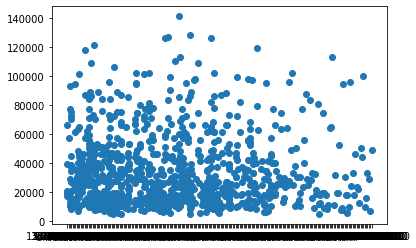

In [17]:
fig,ax=plt.subplots()
ax.scatter(data["saledate"][:1000],data["SalePrice"][:1000]);

In [18]:
data.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
401120     11/2/2011 0:00
401121     11/2/2011 0:00
401122     11/2/2011 0:00
401123    10/25/2011 0:00
401124    10/25/2011 0:00
Name: saledate, Length: 401125, dtype: object

**The saledate is not in the correct format, so need to convert it into something useful.**

Thus can use parse_dates(which will convert the string representation of date into a date time object) while reding the data and further use pandas api to extract important info.

In [19]:
parsed_data=pd.read_csv("Train.csv",low_memory=False,parse_dates=["saledate"])
parsed_data.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [20]:
parsed_data.drop(["SalesID"],axis=1,inplace=True)

**I dropped the SalesID column because it wass all unique for every data so it would not have any contribution in training the model, Hence dropped it**

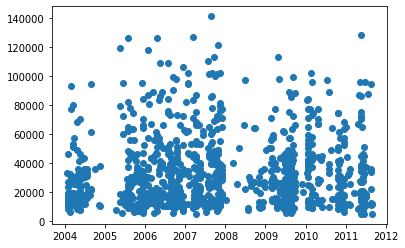

In [21]:
fig,ax=plt.subplots()
ax.scatter(parsed_data["saledate"][:1000],parsed_data["SalePrice"][:1000]);

In [22]:
parsed_data.sort_values(by=["saledate"],inplace=True,ascending=True)
parsed_data

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,12G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,13500,1799594,4102,149,2.0,1000,NaN,NaN,2011-12-30,D4C,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
397987,9750,1872596,4875,149,2.0,1000,NaN,NaN,2011-12-30,520C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
392664,14500,1877553,3170,149,2.0,1988,NaN,NaN,2011-12-30,580K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400458,12500,1869637,26456,149,2.0,2010,NaN,NaN,2011-12-30,L160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [23]:
p_data=parsed_data.copy()

In [24]:
p_data["saleyear"]=p_data["saledate"].dt.year
p_data["salemonth"]=p_data["saledate"].dt.month
p_data["saleday"]=p_data["saledate"].dt.day

Now as I have extracted the useful and individual components from the sale date column, I dont need it anymore

In [25]:
p_data.drop("saledate",axis=1,inplace=True)

In [26]:
p_data

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday
205615,9500,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
92803,24000,1169900,7110,132,99.0,1986,NaN,NaN,416,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31
98346,35000,1262088,3357,132,99.0,1975,NaN,NaN,12G,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31
169297,19000,1433229,8247,132,99.0,1978,NaN,NaN,644,644,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
274835,14000,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,13500,1799594,4102,149,2.0,1000,NaN,NaN,D4C,D4,...,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2011,12,30
397987,9750,1872596,4875,149,2.0,1000,NaN,NaN,520C,520,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2011,12,30
392664,14500,1877553,3170,149,2.0,1988,NaN,NaN,580K,580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,30
400458,12500,1869637,26456,149,2.0,2010,NaN,NaN,L160,L160,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2011,12,30


# Conversion of non numerical columns and data cleaning

now using pandas api, I will see which columns are numeric and which hae object data type, and finally we will convert the object data types one into categories 

In [27]:
for label,content in p_data.items():
    if pd.api.types.is_string_dtype(content):
        print (label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
for label,content in p_data.items():
    if pd.api.types.is_string_dtype(content):
        p_data[label] = content.astype("category").cat.as_ordered()

In [29]:
p_data.head(20)

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday
205615,9500,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
92803,24000,1169900,7110,132,99.0,1986,NaN,NaN,416,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31
98346,35000,1262088,3357,132,99.0,1975,NaN,NaN,12G,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31
169297,19000,1433229,8247,132,99.0,1978,NaN,NaN,644,644,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
274835,14000,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
75378,22500,1413842,7267,132,99.0,1976,NaN,NaN,930,930,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
81383,31000,1082797,7620,132,99.0,1986,NaN,NaN,IT12,IT12,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
134080,46000,1322436,4107,132,99.0,1987,NaN,NaN,D4H,D4,...,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31
55455,17000,1517075,3356,132,99.0,1972,NaN,NaN,12F,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31
55454,17000,1236263,3356,132,99.0,1972,NaN,NaN,12F,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31


In [30]:
p_data["fiModelDesc"].cat.categories

Index(['100C', '104', '1066', '1066E', '1080', '1080B', '1088', '1088CK',
       '1088LT', '1088TTL',
       ...
       'ZX600LC', 'ZX70', 'ZX75', 'ZX75US', 'ZX75USA', 'ZX80', 'ZX800',
       'ZX800LC', 'ZX80LCK', 'ZX850H'],
      dtype='object', length=4999)

In [31]:
p_data.fiModelDesc.cat.codes

205615    4536
92803      734
98346       81
169297    1157
274835    1799
          ... 
393123    2136
397987     944
392664    1056
400458    3266
400217    4457
Length: 401125, dtype: int16

In [32]:
p_data.fiModelDesc.cat.codes.value_counts()

492     5039
737     4869
1056    4315
490     4233
105     4083
        ... 
4239       1
787        1
2110       1
2513       1
3383       1
Length: 4999, dtype: int64

now I will see which numeric columns have missing values, and if there are any missing values I will fill them with th median of the column.

Also we can fill them with mean, or mode but I will use median because median is more robust to changes and outliers.

In [33]:
for label,content in p_data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday


In [34]:
for label,content in p_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [35]:
for label, content in p_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            p_data[label + "_data_was_missing"]=pd.isnull(content)
            p_data[label]=content.fillna(content.median())

here I also added a column to showcase that these numeric values were initially missing and I have added them through median 

In [36]:
for label,content in p_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [37]:
p_data.isna().sum()

SalePrice                                         0
MachineID                                         0
ModelID                                           0
datasource                                        0
auctioneerID                                      0
YearMade                                          0
MachineHoursCurrentMeter                          0
UsageBand                                    331486
fiModelDesc                                       0
fiBaseModel                                       0
fiSecondaryDesc                              137191
fiModelSeries                                344217
fiModelDescriptor                            329206
ProductSize                                  210775
fiProductClassDesc                                0
state                                             0
ProductGroup                                      0
ProductGroupDesc                                  0
Drive_System                                 296764
Enclosure   

now we see that no numeric column has any missing value,

Thus, now we have to deal with the missing values in the categorical columns. So, as all of the data is now in the categorical form I would replace data with their categorical codes, so that all the data is finally in numerical form only.

In [38]:
for label, content in p_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        p_data[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        p_data[label] = pd.Categorical(content).codes + 1

I added +1 in the categorical code because by default python assigns the missing values with -1, so we added 1 so that the final categories start from 0 and not -1.

In [39]:
p_data.head(30)

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,9500,1126363,8434,132,18.0,1974,0.0,0,4537,1735,...,True,True,True,True,True,False,False,False,True,True
92803,24000,1169900,7110,132,99.0,1986,0.0,0,735,243,...,True,True,True,True,True,True,True,True,True,True
98346,35000,1262088,3357,132,99.0,1975,0.0,0,82,19,...,True,True,True,True,True,True,True,True,True,True
169297,19000,1433229,8247,132,99.0,1978,0.0,0,1158,349,...,True,True,True,True,True,True,True,True,False,False
274835,14000,1194089,10150,132,99.0,1980,0.0,0,1800,557,...,True,True,True,True,True,True,True,True,False,False
75378,22500,1413842,7267,132,99.0,1976,0.0,0,1702,518,...,True,True,True,True,True,True,True,True,False,False
81383,31000,1082797,7620,132,99.0,1986,0.0,0,3087,1045,...,True,True,True,True,True,True,True,True,False,False
134080,46000,1322436,4107,132,99.0,1987,0.0,0,2154,690,...,True,True,True,True,True,False,False,False,True,True
55455,17000,1517075,3356,132,99.0,1972,0.0,0,81,19,...,True,True,True,True,True,True,True,True,True,True
55454,17000,1236263,3356,132,99.0,1972,0.0,0,81,19,...,True,True,True,True,True,True,True,True,True,True


In [40]:
parsed_data.sort_values(by=["saledate"],inplace=True,ascending=True)
parsed_data.head(30)

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92301,24000,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63155,26500,1089631,4089,132,99.0,1987,NaN,NaN,1989-01-31,D3B,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
127610,23500,1194367,7277,132,99.0,1973,NaN,NaN,1989-01-31,950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
128751,10000,1078853,4103,132,99.0,1972,NaN,NaN,1989-01-31,D4D,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
54438,24000,1199381,4123,132,18.0,1974,NaN,NaN,1989-01-31,D6C,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
127674,23500,1193835,7277,132,99.0,1973,NaN,NaN,1989-01-31,950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
54181,21000,1246885,4123,132,18.0,1972,NaN,NaN,1989-01-31,D6C,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
280078,12500,1340159,10727,132,18.0,1979,NaN,NaN,1989-01-31,510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
75832,29000,1303693,7267,132,99.0,1981,NaN,NaN,1989-01-31,930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [41]:
p_data.isna().sum()

SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 100, dtype: int64

In [42]:
p_data.dtypes.head(30)

SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                      int8
fiModelDesc                   int16
fiBaseModel                   int16
fiSecondaryDesc               int16
fiModelSeries                  int8
fiModelDescriptor             int16
ProductSize                    int8
fiProductClassDesc             int8
state                          int8
ProductGroup                   int8
ProductGroupDesc               int8
Drive_System                   int8
Enclosure                      int8
Forks                          int8
Pad_Type                       int8
Ride_Control                   int8
Stick                          int8
Transmission                   int8
Turbocharged                   int8
Blade_Extension                int8
Blade_Width                 

# Training the model
Finally now, the data is suitable to be trained on as it do not contain any missing values and any non numerical data

In [43]:
import sklearn
from sklearn.ensemble import RandomForestRegressor

In [44]:
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

I only chose 10000 samples for training because first I will check the model on small sample size, if the model performs well, will continue with it. Because training and testing on the whole data set will consume a lot of time.

In [45]:
from sklearn.model_selection import train_test_split

With the train_test_split I will split the data into a training set and a validation set, so that I can do hyperparameter tuning based on the results on the validation data set and improve our model.

In [46]:
x=p_data.drop("SalePrice",axis=1)
y=p_data["SalePrice"]


**as I plan to predict the sale price, I have seperated the data with label and feature. Thus y is a series with sale prices in it, while x contains the rest of the data** 

In [47]:
p_data.shape

(401125, 100)

In [48]:
y.shape

(401125,)

In [49]:
x.shape

(401125, 99)

In [50]:
p_data.shape

(401125, 100)

In [51]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

In [52]:
x_train.shape

(320900, 99)

In [53]:
x_val.shape

(80225, 99)

**now I have split the data in such a way that 80% of the data is on the testing part and 20% on the validation part**

In [54]:
x_train.columns

Index(['MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade',
       'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleyear',
       'salemonth', 'saleday', 'auctioneerID_data_was_missing',
       'MachineHoursCurrentMeter_data_was_mi

In [55]:
model.fit(x_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [56]:
model.score(x_val,y_val)

0.856243645555549

**now just with fitting the model on the training data set with 10000 samples, I have achieved a good score, now lets try to split in a different way and see if I can do better or not. But this is on the validation data, and not on the test data**

In [57]:
p_data.saleyear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

**Now lets try another way of splitting, I will split the data with saleyear as 1999 into validation set and the rest all as training set**

In [58]:
data_val=p_data[p_data.saleyear==1999]
data_train=p_data[p_data.saleyear!=1999]

In [59]:
data_val.shape

(12793, 100)

In [60]:
12793/401125

0.03189280149579308

In [61]:
model.fit(data_train.drop("SalePrice",axis=1),data_train.SalePrice)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [62]:
model.score(data_val.drop("SalePrice",axis=1),data_val.SalePrice)

0.7804239485653854

**again we keep on experimenting,lets try another way of splitting, I will split the data with saleyear as 2009 into validation set and the rest all as training set**

In [63]:
data_val=p_data[p_data.saleyear==2009]
data_train=p_data[p_data.saleyear!=2009]

In [64]:
model.fit(data_train.drop("SalePrice",axis=1),data_train.SalePrice)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [65]:
model.score(data_val.drop("SalePrice",axis=1),data_val.SalePrice)

0.7323484305218949

**Now instead of splitting it into 2 parts and using the score, I will use cross validation split, which actually is much better as it reduces the bias that can occur will split in a certain part, here lets split into 2 sections with 5 different samples**

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
cross_val_score(model,p_data.drop("SalePrice",axis=1),p_data["SalePrice"],cv=5)

array([0.57245484, 0.78639982, 0.83291155, 0.80338584, 0.8142075 ])

In [68]:
0.5706+0.789+0.832+0.7987+0.8


3.7902999999999993

In [69]:
3.79/5

0.758

**Thus, with the cross validation split I got a bit less score, but now this score is much more reliable and reflects the model in a better way** 

**till Now, I have just looked at the score metric to judge the accuacy of the models, but there are much better ways to evaluate the model, such as r2-score, MEA(Mean absolute error), etc.**

**Lets create a function (show_metrics) that will give us the relative values of above mentioned metrics for that particular model.**

In [70]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def show_metrics(model):
    
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    
    score={"train_mae": mean_absolute_error(y_train,train_preds),
          "Val_mae":mean_absolute_error(y_val,val_preds),
          "train_rsqaure":r2_score(y_train,train_preds),
          "val_rsquare":r2_score(y_val,val_preds),
          "train_mse":mean_squared_error(y_train,train_preds),
          "val_mse":mean_squared_error(y_val,val_preds)}
    
    return score


**The more is the r2_score the better is model, and the less the errors(MSE and MAE), the better is the model**

In [71]:
show_metrics(model)

{'train_mae': 5766.606010875663,
 'Val_mae': 5797.0728604549695,
 'train_rsqaure': 0.8532920494261875,
 'val_rsquare': 0.8523207551682823,
 'train_mse': 77736142.54975455,
 'val_mse': 78861661.50061817}

**Now, lets use a RandomizedSearchCV that help to choose better parameters from list of given parameters for our model**

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
rf_grid={"n_estimators":[10,50,100,200],
        "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

**rf_grid is the dictionary of parameters and values that the model will check for and suggest the best parameters among them based on the number of iterations specified, To get this grid I searched on the internet about the parameter to tune and the values to check for**

In [74]:
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=3,
                              cv=5,
                              verbose=True)

In [75]:
cross_val_score(rs_model,p_data.drop("SalePrice",axis=1),p_data["SalePrice"],cv=5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


array([0.46500396, 0.75239911, 0.60869059, 0.77622306, 0.47207677])

In [76]:
(0.485+0.656+0.777+0.792+0.767)/5

0.6954

In [77]:
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=True)

In [78]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [79]:
show_metrics(rs_model)

{'train_mae': 6276.816328965017,
 'Val_mae': 6378.39170436899,
 'train_rsqaure': 0.8219185777439695,
 'val_rsquare': 0.8174935236024281,
 'train_mse': 94360004.15664506,
 'val_mse': 97459625.95987414}

# testing on the actual data
**Now lets move out of data exploration and model testing, lets see how our model fits to the actual test data.**

In [80]:
data_test=pd.read_csv("Test.csv",parse_dates=["saledate"])

In [81]:
data_test.drop(["SalesID"],inplace=True,axis=1)

In [82]:
data_test.head()

,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


**Now again the test data has categorical columns and missing values, so I need to do the preprocessing in the same manner as for the training data, hence lets create a preprocessing function that takes the data and process it to remove missing vales and convert all the data in the numerical form.**

In [83]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [84]:
data_test=preprocess_data(data_test)

In [85]:
data_test.isna().sum()

MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 98, dtype: int64

In [86]:
data_test.dtypes

MachineID                       int64
ModelID                         int64
datasource                      int64
auctioneerID                    int64
YearMade                        int64
                                ...  
Backhoe_Mounting_is_missing      bool
Blade_Type_is_missing            bool
Travel_Controls_is_missing       bool
Differential_Type_is_missing     bool
Steering_Controls_is_missing     bool
Length: 98, dtype: object

Now our test data do not have any missing values and any non numerical values, so can proceed further.

In [87]:
data_test.shape

(12457, 98)

In [88]:
p_data.columns

Index(['SalePrice', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleyear', 'salemonth',
       'saleday', 'auctioneerID_data_was_missing',
       'MachineHoursCurr

In [89]:
data_test.columns

Index(['MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade',
       'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleyear',
       'salemonth', 'saleday', 'MachineHoursCurrentMeter_is_missing',
       'UsageBand_is_missing', 'fiMode

In [90]:
set(x_train.columns)-set(data_test.columns)

{'MachineHoursCurrentMeter_data_was_missing', 'auctioneerID_data_was_missing'}

**Now,see that x_train has a column less than that of data_test, this is because, we added extra columns such as machinehours data is missing,etc to depict the missing values, so we need added these extra columns in the test data as well so that the comparison can be done.**

In [91]:
data_test["auctioneerID_data_was_missing"]=False
data_test["MachineHoursCurrentMeter_data_was_missing"]=False



In [92]:
x_train.columns

Index(['MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade',
       'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleyear',
       'salemonth', 'saleday', 'auctioneerID_data_was_missing',
       'MachineHoursCurrentMeter_data_was_mi

In [93]:
data_test.columns

Index(['MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade',
       'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleyear',
       'salemonth', 'saleday', 'MachineHoursCurrentMeter_is_missing',
       'UsageBand_is_missing', 'fiMode

In [94]:
data_test.columns.difference(x_train.columns)

Index(['MachineHoursCurrentMeter_is_missing'], dtype='object')

In [95]:
x_train.columns.difference(data_test.columns)

Index([], dtype='object')

now, it is seen that data_test has now a column extra, so will drop it

In [96]:
data_test.MachineHoursCurrentMeter_is_missing

0        False
1        False
2        False
3        False
4        False
         ...  
12452     True
12453     True
12454     True
12455     True
12456     True
Name: MachineHoursCurrentMeter_is_missing, Length: 12457, dtype: bool

In [97]:
data_test.drop("MachineHoursCurrentMeter_is_missing",inplace=True,axis=1)

In [98]:
data_test.shape

(12457, 99)

# making predictions
Now we have a model based on 10000 samples, I will use it for the prediction now and compare with the original test data
Also model is the RandomForestRegressor one and rs_model is the tuned model with RandomizedSearch CV 

In [99]:
test_preds=model.predict(data_test)

C:\Users\M Com\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [100]:
test_preds_rs=rs_model.predict(data_test)
test_preds_rs

C:\Users\M Com\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([18035.341387  , 29088.14673265, 50497.68252581, ...,
       12694.8939092 , 17010.38768043, 20850.24708747])

In [101]:
test_orig_ans=pd.read_csv("test_predictions.csv")

In [102]:
test_orig_ans.shape

(12457, 2)

In [103]:
test_orig_ans.drop("SalesID",inplace=True,axis=1)

our test data answers had an extra column corresponding to the sales id

In [104]:
test_orig_ans.to_numpy()

array([[20531.51652783],
       [22264.04045921],
       [51282.34671809],
       ...,
       [18321.65196727],
       [17611.80521904],
       [29852.76494909]])

In [105]:
test_preds_rs

array([18035.341387  , 29088.14673265, 50497.68252581, ...,
       12694.8939092 , 17010.38768043, 20850.24708747])

In [106]:
r2_score(test_orig_ans,test_preds_rs)

0.8345456212455159

In [107]:
r2_score(test_orig_ans,test_preds)

0.8686367481266116

Yeah, now using the model trained on 10000 samples we achieved an score of 86%, lets use all of our data to train the model now

In [108]:
model=RandomForestRegressor(n_jobs=-1,random_state=42)

In [126]:
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [127]:
model.score(x_val,y_val)

0.906776423427123

In [128]:
val_preds=model.predict(x_val)

In [129]:
val_preds

array([12772. , 29800. , 20565. , ..., 16562.5, 31607.5, 36590. ])

In [130]:
r2_score(y_val,val_preds)

0.906776423427123

In [131]:
test_preds=model.predict(data_test)

C:\Users\M Com\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [132]:
r2_score(test_orig_ans,test_preds)

0.7488341700109181

Lets see what results we get using Linear Regression model and knn regressor model

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
linerregmodel=LinearRegression()

In [135]:
linerregmodel.fit(x_train,y_train)

LinearRegression()

In [136]:
linerregmodel.score(x_val,y_val)

0.4604368936458689

In [137]:
test_preds_linreg=linerregmodel.predict(data_test)

C:\Users\M Com\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [138]:
r2_score(test_orig_ans,test_preds_linreg)

-18.64499513762753

In [139]:
from sklearn.neighbors import KNeighborsRegressor

In [140]:
clf=KNeighborsRegressor()

In [141]:
clf.fit(x_train, y_train)

KNeighborsRegressor()

In [142]:
clf.score(x_val,y_val) 

0.27196925177452835

**I see that the linear regression and the knn model worked very poorly on our data, but the randomforestregressor model did very well comparatively.**